<a href="https://colab.research.google.com/github/Justduzi/Multi_class_Neural_Network/blob/main/Neural_Network_Multi_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Building a neural network to classify images of different clothing items

In [9]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [2]:
#check shape
train_images[0].shape, train_labels[0].shape

((28, 28), ())

In [3]:
class_names = ["T-shirt/Top","Trouser", "Pullover"," Dress", "Coat", "sandal","Shirt","Sneaker", "Bag","Ankle Boot"]

Four Multi-class we are  using a similar architechture tobinary classification buy itha few tweaks
* Input shape = 28 x 28
* Output shape= 10(one per class of clothing)
* Loss function CategorialCrossentropy() for one hot enocoded labels = tf.one_hot(y_train , depth=size)
* Loss Function SparseCategoricalCrossentropy for integers
* Output Layer activation = Softmax
* data needs to be flattened= tf.keras.layers.Flatten(input_shape=())


In [4]:
#Building Multiclass Neural Network

#create random seed
tf.random.set_seed(42)

#Create model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax)
])
#Compile model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
#Fit
non_norm_history = model_1.fit(train_images, train_labels, epochs=10, validation_data=(test_images,test_labels) )

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

Neural Networks prefer data to be scaled (or normalised) making the between 0 & 1

In [10]:
train_images.min(), train_images.max()

(0, 255)

In [11]:
train_images_norm = train_images / 255.0
test_images_norm = test_images / 255.0

In [12]:
#build NN with normalised data

#Create random seed
tf.random.set_seed(42)

#Create model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

#Compile model
model_2.compile(loss="SparseCategoricalCrossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

#fit
history_norm = model_2.fit(train_images_norm, train_labels,epochs=10, validation_data=(test_images_norm,test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

In [13]:
import pandas as pd


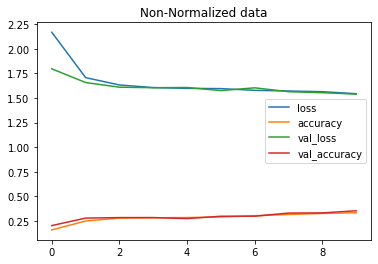

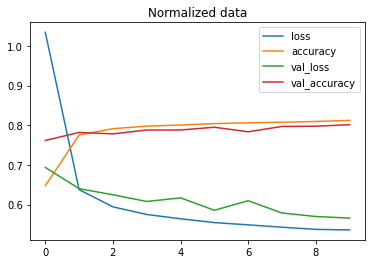

In [14]:
pd.DataFrame(non_norm_history.history).plot(title="Non-Normalized data")
pd.DataFrame(history_norm.history).plot(title="Normalized data")

When comparing results Normalised data produces better results.